In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_validate

In [2]:
df_train = pd.read_csv('train_data.csv')
df_test = pd.read_csv('test_data.csv')
df_train.head(3)

,Species,Country.of.Origin,Number.of.Bags,In.Country.Partner,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,...,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_low_meters,altitude_high_meters,quality
0,Arabica,"Tanzania, United Republic Of",300,Tanzanian Coffee Board,Arusha,Washed / Wet,7.67,7.5,7.33,7.25,...,7.75,82.83,0.11,0,0.0,Green,5,1400.0,1400.0,excellent
1,Arabica,Brazil,25,NUCOFFEE,Mundo Novo,Semi-washed / Semi-pulped,7.75,7.5,7.58,7.50,...,7.58,83.17,0.12,0,0.0,Blue-Green,3,1000.0,1000.0,excellent
2,Arabica,"Tanzania, United Republic Of",1,Africa Fine Coffee Association,Other,Washed / Wet,7.42,7.5,7.50,7.33,...,7.50,82.08,0.12,0,0.0,Green,3,1500.0,1700.0,excellent


In [13]:
df_test.shape

(182, 25)

In [30]:
df_train.shape

(1244, 25)

In [44]:
X_train = df_test.drop(['quality'], axis=1)
X_test = df_test.drop(['quality'], axis=1)

y_train = df_test['quality']
y_test = df_test['quality']

In [45]:
X_test.head(3)

,Species,Country.of.Origin,Number.of.Bags,In.Country.Partner,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,...,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_low_meters,altitude_high_meters
0,Arabica,Colombia,275,Almacafé,Caturra,Washed / Wet,7.67,7.75,7.42,7.83,...,10.0,7.42,83.33,0.11,0,0.0,Green,1,1650.0,1650.0
1,Arabica,Honduras,275,Instituto Hondureño del Café,Caturra,Washed / Wet,7.50,7.58,7.33,7.50,...,10.0,7.58,82.33,0.10,0,1.0,Green,8,1396.0,1396.0
2,Arabica,Mexico,10,AMECAFE,Bourbon,Washed / Wet,7.50,7.58,7.42,7.67,...,10.0,7.33,82.25,0.13,0,0.0,Green,3,1170.0,1170.0


In [46]:
stnd = StandardScaler()
X_train_num = X_train.select_dtypes(include='number')
stnd.fit(X_train_num)
X_train_num = pd.DataFrame(stnd.transform(X_train_num),columns=X_train_num.columns)

X_train_cat = X_train.select_dtypes(exclude='number')
X_train_cat = pd.get_dummies(X_train_cat)

X_train = pd.concat([X_train_num, X_train_cat], axis=1)
X_train.head(3)

,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,...,Variety_Yellow Bourbon,Processing.Method_Natural / Dry,Processing.Method_Other,Processing.Method_Pulped natural / honey,Processing.Method_Semi-washed / Semi-pulped,Processing.Method_Washed / Wet,Color_Blue-Green,Color_Bluish-Green,Color_Green,Color_None
0,0.798278,0.457153,0.867306,0.233147,1.045349,1.239225,-0.169285,0.275174,0.183353,0.153006,...,0,0,0,0,0,1,0,0,1,0
1,0.798278,-0.242368,0.273492,-0.054641,-0.093274,-0.274211,-0.169285,0.275174,0.183353,0.153006,...,0,0,0,0,0,1,0,0,1,0
2,-1.090134,-0.242368,0.273492,0.233147,0.493290,-0.606429,-0.169285,0.275174,0.183353,0.153006,...,0,0,0,0,0,1,0,0,1,0


In [47]:
stnd = StandardScaler()
X_test_num = X_test.select_dtypes(include='number')
stnd.fit(X_test_num)
X_test_num = pd.DataFrame(stnd.transform(X_test_num),columns=X_test_num.columns)

X_test_cat = X_test.select_dtypes(exclude='number')
X_test_cat = pd.get_dummies(X_test_cat)

X_test = pd.concat([X_test_num, X_test_cat], axis=1)
X_test.head(3)

,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,...,Variety_Yellow Bourbon,Processing.Method_Natural / Dry,Processing.Method_Other,Processing.Method_Pulped natural / honey,Processing.Method_Semi-washed / Semi-pulped,Processing.Method_Washed / Wet,Color_Blue-Green,Color_Bluish-Green,Color_Green,Color_None
0,0.798278,0.457153,0.867306,0.233147,1.045349,1.239225,-0.169285,0.275174,0.183353,0.153006,...,0,0,0,0,0,1,0,0,1,0
1,0.798278,-0.242368,0.273492,-0.054641,-0.093274,-0.274211,-0.169285,0.275174,0.183353,0.153006,...,0,0,0,0,0,1,0,0,1,0
2,-1.090134,-0.242368,0.273492,0.233147,0.493290,-0.606429,-0.169285,0.275174,0.183353,0.153006,...,0,0,0,0,0,1,0,0,1,0


In [48]:
y_train.shape

(182,)

In [49]:
X_train.shape

(182, 88)

In [50]:
clf = SVC()
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [59]:
grid = {'C': np.logspace(0.1,1000), 'gamma': np.logspace(0.001,1000), 'kernel': ['rbf']}
clfCV = GridSearchCV(clf,param_grid=grid,return_train_score=True,n_jobs=-1)
clfCV.fit(X_train,y_train)

c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\function_base.py:277: RuntimeWarning: overflow encountered in power
  return _nx.power(base, y)


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.25892541e+000, 3.20717346e+020, 8.17042971e+040, 2.08145654e+061,
       5.30261134e+081, 1.35086592e+102, 3.44139635e+122, 8.76712387e+142,
       2.23346727e+163, 5.68986603e+183, 1.44952093e+204, 3.69272476e+224,
       9.40739518e+244, 2.39657948e+265, 6.10540230e+285, 1.55538080e+306,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,...
       4.30101967e+081, 1.10081487e+102, 2.81745600e+122, 7.21107479e+142,
       1.84562242e+163, 4.72373705e+183, 1.20900632e+204, 3.09436420e+224,
       7.91980130e+244, 2.02701584e+265, 5.18800039e+285, 1.32783116e+306,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,   

In [60]:
print('         best gamma and C =',clfCV.best_params_)
print('  validation R2 =',clfCV.best_score_.round(3))

         best gamma and C = {'C': 1.2589254117941673, 'gamma': 1.0023052380778996, 'kernel': 'rbf'}
  validation R2 = 0.885


In [61]:
print('test R2',clfCV.score(X_test,y_test).round(3))

test R2 1.0


# Visualizing Results!

In [68]:
X_test['Category.Two.Defects']

0     -0.533886
1      0.791983
2     -0.155066
3      1.170803
4     -0.723296
         ...   
177   -0.155066
178    0.223753
179    1.170803
180    0.034344
181   -0.723296
Name: Category.Two.Defects, Length: 182, dtype: float64

def DecisionBoundaryModified(clf,target_name,X,y):
    
    from sklearn.preprocessing import StandardScaler,LabelEncoder
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    N     = 250   # N x N number of points for 2D grid generation
    alpha = 0.2   # point transparency
    pt_size = 200
    sns.set_palette('bright')
    cmap = sns.color_palette('bright')

    # create 2D grid of points in feature space
    X1 = X_test['Category.Two.Defects']
    X2 = X_test['Number.of.Bags']
    XX1,XX2 = np.meshgrid(
    np.linspace(X1.min(),X1.max(),N),
    np.linspace(X2.min(),X2.max(),N))
    
     
    # predict targets on 2D grid
    features_grid = np.stack([XX1.ravel(),XX2.ravel()],axis=1)
    features_grid = features_grid
    Y = clf.predict(features_grid)
    YY = Y.reshape(XX1.shape)
    
    
    # plot test set
    fig1,ax1 = plt.subplots(figsize=(10,10))
    sns.scatterplot(x='Category.Two.Defects',
                    y='Number.of.Bags',
                    hue=target_name,
                    data=df_train,
                    s=pt_size,
                    ax=ax1)
    plt.contourf(XX1,XX2,YY,alpha=alpha,colors=cmap)
    plt.title('test set')
    
    error_test  = 1 - clf.score(X,y)
    
    return error_test


In [80]:
y_test.head(3)

0    excellent
1    excellent
2    excellent
Name: quality, dtype: object

In [84]:
# %load "DecisionBoundary.py"
def DecisionBoundaryModified2(clf,feature_names,target_name,df_test,df_train):
    
    from sklearn.preprocessing import StandardScaler,LabelEncoder
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    N     = 250   # N x N number of points for 2D grid generation
    alpha = 0.2   # point transparency
    pt_size = 200
    sns.set_palette('bright')
    cmap = sns.color_palette('bright')

    # create 2D grid of points in feature space
    X1 = df_test[feature_names[0]]
    X2 = df_test[feature_names[1]]
    XX1,XX2 = np.meshgrid(
    np.linspace(X1.min(),X1.max(),N),
    np.linspace(X2.min(),X2.max(),N))
    
    # integer code categories
    df_test['target_code'] = LabelEncoder().fit_transform(df_test[target_name])
    df_train['target_code'] = LabelEncoder().fit_transform(df_train[target_name])
    
    # # shuffle and stratified-split data
    # (df_train,df_test) = train_test_split(df,
    #                                       train_size=0.8,
    #                                       test_size=0.2,
    #                                       shuffle=True,
    #                                       stratify=df[target_name],
    #                                       random_state=0)
    
    # assign features and targets
    features_train = df_train[feature_names]
    features_test  = df_test[feature_names]
    target_train   = df_train['target_code']
    target_test    = df_test['target_code']
    
    # standardize
    stnd = StandardScaler()
    stnd.fit(features_train)
    features_train = stnd.transform(features_train)
    features_test  = stnd.transform(features_test)
    
    # fit classifier
    clf.fit(features_train,target_train)
    
    # predict targets on 2D grid
    features_grid = np.stack([XX1.ravel(),XX2.ravel()],axis=1)
    features_grid = stnd.transform(features_grid)
    Y = clf.predict(features_grid)
    YY = Y.reshape(XX1.shape)
    
    
    # plot train set
    fig1,ax1 = plt.subplots(figsize=(10,10))
    sns.scatterplot(x=feature_names[0],
                    y=feature_names[1],
                    hue=target_name,
                    data=df_train,
                    s=pt_size,
                    ax=ax1)
    plt.contourf(XX1,XX2,YY,alpha=alpha,colors=cmap)
    plt.title('train set')
    
    # plot test set
    fig2,ax2 = plt.subplots(figsize=(10,10))
    sns.scatterplot(x=feature_names[0],
                          y=feature_names[1],
                          hue=target_name,
                          data=df_test,
                          s=pt_size,
                          ax=ax2)
    plt.contourf(XX1,XX2,YY,alpha=alpha,colors=cmap)
    plt.title('test set')
    
    error_train = 1 - clf.score(features_train,target_train)
    error_test  = 1 - clf.score(features_test,target_test)
    
    return error_train, error_test


In [85]:
df_test.head(3)

,Species,Country.of.Origin,Number.of.Bags,In.Country.Partner,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,...,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_low_meters,altitude_high_meters,quality
0,Arabica,Colombia,275,Almacafé,Caturra,Washed / Wet,7.67,7.75,7.42,7.83,...,7.42,83.33,0.11,0,0.0,Green,1,1650.0,1650.0,excellent
1,Arabica,Honduras,275,Instituto Hondureño del Café,Caturra,Washed / Wet,7.50,7.58,7.33,7.50,...,7.58,82.33,0.10,0,1.0,Green,8,1396.0,1396.0,excellent
2,Arabica,Mexico,10,AMECAFE,Bourbon,Washed / Wet,7.50,7.58,7.42,7.67,...,7.33,82.25,0.13,0,0.0,Green,3,1170.0,1170.0,excellent


In [87]:
chosen_features = pd.concat([df_test['Category.Two.Defects'],df_test['Number.of.Bags']], axis=1)
chosen_features.head(3)

,Category.Two.Defects,Number.of.Bags
0,1,275
1,8,275
2,3,10


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


(0.3110932475884244, 0.2912087912087912)

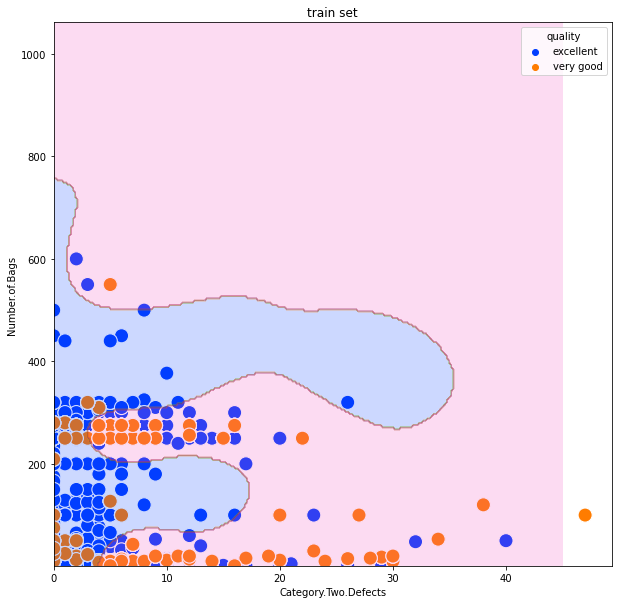

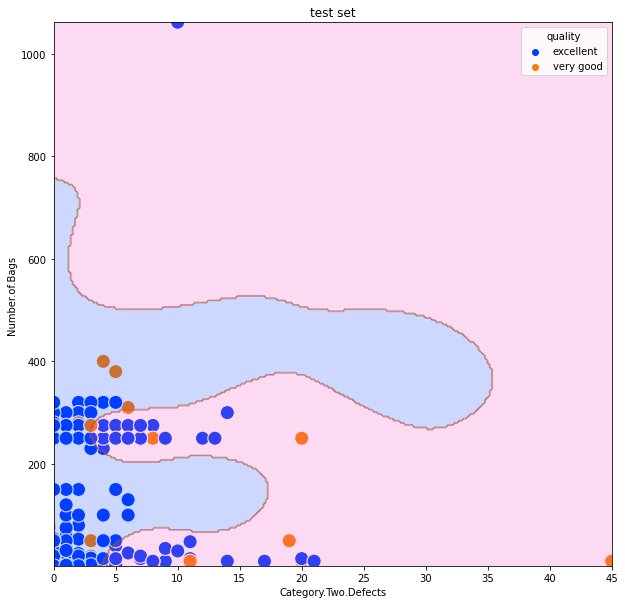

In [89]:
# clf = SVC(C=100,kernel='rbf',gamma=0.03)
clf = SVC(C=1.2589,kernel='rbf',gamma=1.0023)
DecisionBoundaryModified2(clf,chosen_features.columns,'quality',df_test,df_train)